## 1.导入对应的模块

In [19]:
import numpy as np
import os

## 2.数据可视化

### 2.1定义一个用来处理一个数据的函数

In [20]:
# 定义名为 cope_one_data 的函数，该函数接受一个文件路径参数 file_path
def cope_one_data(file_path):
    # 创建一个空列表 one_num_data 用于保存一个数字的所有数据
    one_num_data = []

    # 使用 'utf-8' 编码打开文件
    with open(file_path, 'r', encoding='utf-8') as file:
        # 遍历文件的每一行
        for line in file:
            # 创建一个空列表 one_row_data 用于保存一行数据
            one_row_data = []

            # 去除每行的换行符，并将结果保存在 clean_str 中
            clean_str = line.replace("\n", "")

            # 遍历 clean_str 中的每个字符
            for num in clean_str:
                # 将字符转换为整数并添加到 one_row_data 中
                one_row_data.append(int(num))

            # 将 one_row_data 添加到 one_num_data 列表中
            one_num_data.append(one_row_data)

    # 将 one_num_data 转换为 NumPy 数组并保存在 one_num_data_array 中
    one_num_data_array = np.array(one_num_data)

    # 返回 one_num_data_array
    return one_num_data_array



### 2.2对部分数据进行可视化

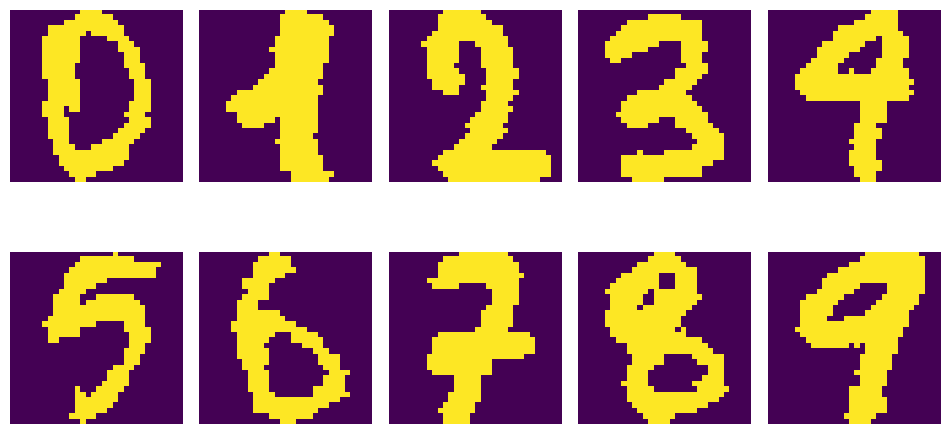

In [21]:
# 创建一个空列表 nums，用于存储处理后的数据
nums = []

# 使用循环遍历数字 0 到 9
for i in range(10):
    # 构建文件路径，每个文件包含一个手写数字的数据
    path = 'kNN_hand_writing/trainingDigits/' + str(i) + '_0.txt'
    
    # 调用前面定义的 cope_one_data 函数处理文件并将结果添加到 nums 列表中
    nums.append(cope_one_data(path))

# 导入 matplotlib 库用于绘图
import matplotlib.pyplot as plt

# 创建一个 2x5 的子图布局，设置画布大小为 (12, 6)
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# 初始化变量 r 用于遍历 nums 列表
r = 0

# 嵌套循环以在子图中显示数字图像
for i in range(2):
    for j in range(5):
        # 使用 imshow 函数显示数字图像
        axs[i][j].imshow(nums[r])
        
        # 关闭子图坐标轴
        axs[i, j].axis('off')
        
        # 更新 r 以继续遍历 nums 列表中的下一个数字图像
        r = r + 1

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# 显示绘制的图像
plt.show()





## 3.批量处理训练集和测试集的数据

### 3.1定义可以批量处理数据的函数

In [22]:
# 定义名为 cope_data 的函数，该函数接受一个文件夹路径参数 folder_path
def cope_data(folder_path):
    # 创建一个空列表 all_num_data 用于保存所有数字的数据
    all_num_data = []

    # 创建一个空列表 num_label 用于保存数字的标签
    num_label = []

    # 创建一个空字典 dataset 用于保存数据集的 X 和 Y 部分
    dataset = {}

    # 使用 os.walk 遍历指定文件夹及其子文件夹
    for foldername, subfolders, filenames in os.walk(folder_path):
        # 遍历每个文件夹中的文件
        for filename in filenames:
            # 创建一个空列表 one_num_data 用于保存一个数字的数据
            one_num_data = []

            # 构建完整的文件路径
            file_path = os.path.join(foldername, filename)

            # 将文件名的第一个字符（数字对应的标签）转换为整数，并添加到 num_label 列表中
            num_label.append(int(filename[0]))

            # 使用 'utf-8' 编码打开文件
            with open(file_path, 'r', encoding='utf-8') as file:
                # 遍历文件的每一行
                for line in file:
                    # 去除每行的换行符，并将结果保存在 clean_str 中
                    clean_str = line.replace("\n", "")

                    # 遍历 clean_str 中的每个字符
                    for num in clean_str:
                        # 将字符转换为整数并添加到 one_num_data 中
                        one_num_data.append(int(num))

            # 将 one_num_data 添加到 all_num_data 列表中
            all_num_data.append(one_num_data)

    # 将 all_num_data 转换为 NumPy 数组
    all_num_data_array = np.array(all_num_data)

    # 将 num_label 转换为 NumPy 数组
    num_label_array = np.array(num_label)

    # 将数据集的 X 部分保存在 dataset 字典中
    dataset['X'] = all_num_data_array

    # 将数据集的 Y 部分保存在 dataset 字典中
    dataset['Y'] = num_label_array

    # 返回包含数据集的字典
    return dataset


### 3.2读取训练集数据

In [23]:
# 定义训练数据文件夹的路径
train_folder_path = 'kNN_hand_writing/trainingDigits'

# 使用前面定义的 cope_data 函数处理训练数据文件夹，返回数据集 train_dataset
train_dataset = cope_data(train_folder_path)

# 从 train_dataset 中获取训练数据部分 X_train
X_train = train_dataset['X']

# 从 train_dataset 中获取训练标签部分 y_train
y_train = train_dataset['Y']

# 打印训练数据的形状，即数据集中样本的数量和特征的维度
print(X_train.shape)

# 打印训练标签的形状，即标签数组的长度
print(y_train.shape)


(1934, 1024)
(1934,)


### 3.3读取测试集数据

In [24]:
# 定义测试数据文件夹的路径
test_folder_path = 'kNN_hand_writing/testDigits'

# 使用前面定义的 cope_data 函数处理测试数据文件夹，返回数据集 test_dataset
test_dataset = cope_data(test_folder_path)

# 从 test_dataset 中获取测试数据部分 X_test
X_test = test_dataset['X']

# 从 test_dataset 中获取测试标签部分 y_test
y_test = test_dataset['Y']

# 打印测试数据的形状，即数据集中样本的数量和特征的维度
print(X_test.shape)

# 打印测试标签的形状，即标签数组的长度
print(y_test.shape)


(946, 1024)
(946,)


## 4.手动实现KNN算法

### 4.1定义一个用于计算距离的函数

本项目所采用的距离是欧式距离


In [25]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


### 4.2定义用于预测的函数

部分代码注释：

np.bincount(k_nearest_labels): 用于统计一个列表中每个数字出现的次数

比如：
```
a = np.bincount([8,8,7,9,9,9])
print(a)

输出结果为：[0 0 0 0 0 0 0 1 2 3]
表示0~6出现了0次，7出现1次，8出现2次，9出现3次
```


.argmax(): 一旦我们有了每个标签出现的次数，我们使用argmax函数找到具有最大计数的标签的索引。换句话说，它返回了在数组中具有最大值的元素的索引。

比如：
```
a = np.bincount([8,8,7,9,9,9]).argmax()
print(a)

输出结果为：9
```

In [26]:
def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for x_test in X_test:
        # 计算每一个测试样本与所有训练样本的距离
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        # 获取K个最近邻的训练样本的索引
        k_indices = np.argsort(distances)[:k]
        # 获取K个最近邻的训练样本的标签
        k_nearest_labels = [y_train[i] for i in k_indices]
        # 返回K个最近邻样本中最常见的标签作为预测结果
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

### 4.3进行预测并计算准确率

In [27]:
# 导入 scikit-learn 中的 accuracy_score 函数，用于计算分类准确度
from sklearn.metrics import accuracy_score

# 使用 knn_predict 函数对测试数据 X_test 进行预测，将结果保存在 y_pred 中
y_pred = knn_predict(X_train, y_train, X_test)

# 使用 accuracy_score 函数计算真实标签 y_test 和预测标签 y_pred 之间的准确度
accuracy = accuracy_score(y_test, y_pred)

# 打印 KNN 分类器的准确度，以百分比形式显示，保留两位小数
print(f"KNN分类器的准确度：{accuracy * 100:.2f}%")


KNN分类器的准确度：98.84%
